In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')
import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_rows', None)
import scipy.stats as stats
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
from scipy.stats import shapiro
from numpy import random

In [3]:
# Importing data
brachytherapy = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\interim\brachytherapy.csv")

df = brachytherapy[['id','total_apoint_right','eqd2_total_dose']].copy()
df.dropna(axis=0, inplace=True)
eqd2_total_dose = df['eqd2_total_dose'].copy()
total_apoint_right = df['total_apoint_right'].copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 84
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  80 non-null     int64  
 1   total_apoint_right  80 non-null     float64
 2   eqd2_total_dose     80 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


## Descriptive statistics

### eqd2_total_dose

In [4]:
eqd2_total_dose.describe()

count    80.000000
mean     85.447500
std       2.478361
min      76.600000
25%      84.300000
50%      85.800000
75%      86.850000
max      89.900000
Name: eqd2_total_dose, dtype: float64

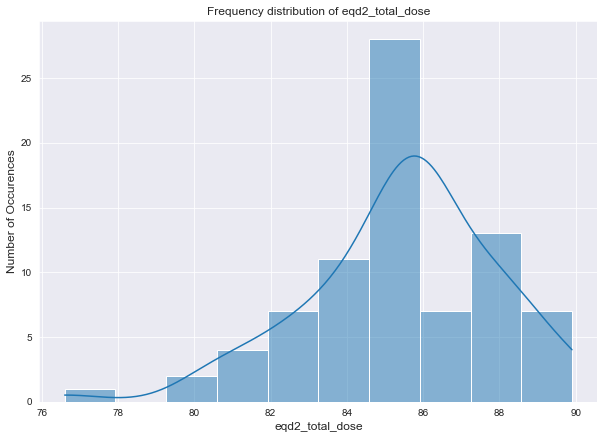

In [5]:
plt.figure(figsize=(10,7))
sns.histplot(eqd2_total_dose,kde=True,bins=10)
plt.title("Frequency distribution of eqd2_total_dose")
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('eqd2_total_dose',fontsize=12)
plt.show()

In [6]:
#Testing for normality
alpha = 0.05
statistic,p_value = shapiro(eqd2_total_dose)
print ("Testing values of eqd2_total_dose for normality using the Shapiro-Wilk test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of eqd2_total_dose for normality using the Shapiro-Wilk test.
The test statistic is: 0.9529775381088257. The p_value is: 0.005123143084347248.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.


### total_apoint_right

count    80.000000
mean     74.237500
std       6.358158
min      58.300000
25%      69.775000
50%      74.000000
75%      79.000000
max      89.300000
Name: total_apoint_right, dtype: float64

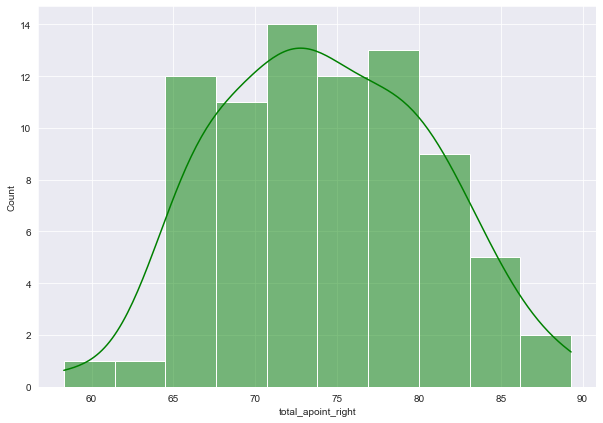

In [7]:
plt.figure(figsize=(10,7))
sns.histplot(total_apoint_right, kde=True, bins=10, color='green')
total_apoint_right.describe()

In [8]:
#Testing for normality
alpha = 0.05
statistic,p_value = shapiro(total_apoint_right)
print ("Testing values of total_apoint_right for normality using the Shapiro-Wilk test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of total_apoint_right for normality using the Shapiro-Wilk test.
The test statistic is: 0.9877043962478638. The p_value is: 0.6449394822120667.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


## Inferential statistics

### Pearson's correlation coefficient between two variables

In [9]:
corrcoef = np.corrcoef(eqd2_total_dose,total_apoint_right)[0,1]
print("The correlation coefficient between hrctv_volume, eqd2_hrbrachy_dose is {}.".format(corrcoef))

The correlation coefficient between hrctv_volume, eqd2_hrbrachy_dose is 0.3948835787077345.


The linear correlation between two variable is a weak positive 0.3949.

Let's test if this correlation is statistically significant. To do this, we can calculate the p-value associated with the Pearson correlation coefficient. The p-value is 0.03 which is less than the alpha=0.05. Therefore, the correlation coefficient value is statistically significant.

In [10]:
alpha = 0.05
statistic,p_value = pearsonr(eqd2_total_dose,total_apoint_right)
print ("Testing the Pearson's correlation between values of total_apoint_right and eqd2_total_dose."+"\nThe test statistics or the correlation coefficient is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The correlation is not statistically significant."+"\nHA = The correlation is statistically significant."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing the Pearson's correlation between values of total_apoint_right and eqd2_total_dose.
The test statistics or the correlation coefficient is: 0.3948835787077346. The p_value is: 0.0002891291697688438.
H0 = The correlation is not statistically significant.
HA = The correlation is statistically significant.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.


Let's take a look at the scatter plot between the variables. In the x-axis we have total_apoint_right, in the y-axis we have eqd2_total_dose. On the scatterplot below we can notice a weak positive relationship.

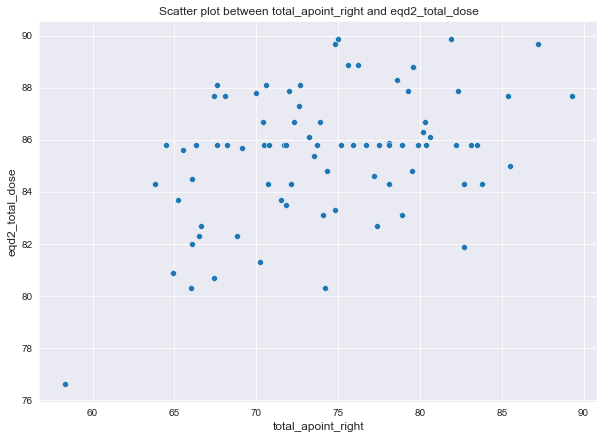

In [11]:
plt.figure(figsize=(10,7))
plt.title("Scatter plot between total_apoint_right and eqd2_total_dose")
plt.ylabel('eqd2_total_dose', fontsize=12)
plt.xlabel('total_apoint_right',fontsize=12)
sns.scatterplot(data=df, x='total_apoint_right', y='eqd2_total_dose')
plt.show()


### OLS Regression model

Now, let's see if there is a statistically significant relationship between the two sets of variables using a OLS Linear regression model.

In [12]:
# Ordinary Least squares regression modelling
Y = eqd2_total_dose
X = total_apoint_right
X = sm.add_constant(total_apoint_right)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        eqd2_total_dose   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     14.41
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           0.000289
Time:                        00:32:19   Log-Likelihood:                -178.84
No. Observations:                  80   AIC:                             361.7
Df Residuals:                      78   BIC:                             366.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 74.0207      3

Now, let's interpret the results of the simple regression model.

Simple linear regression was used to test if total_apoint_right significantly predicted eqd2_hrbrachy_dose.
The fitted regression model was:

eqd2_hrbrachy_dose = 74.02 + 0.1439 * total_apoint_right

The overall regression was statistically significant (R-squared = 0.156, F(1,78) = 14.41, p = 0.0002).

R-squared represents the proportion of the variance in the eqd2_hrbrachy_dose based on the values of total_apoint_right. In other words, it shows how well the data fit the model. Small R-squared = 0.156 imply that only 15.6% of total_apoint_right values are impacting eqd2_hrbrachy_dose in the Simple Regression model.

It was found that total_apoint_right significantly predicted eqd2_hrbrachy_dose (β = 0.1539, p = 0.000). The p-value is lower than alpha indicating that the variable is meaningful and suggests that changes in the eqd2_hrbrachy_dose are related to the changes in the total_apoint_right. The coefficent of total_apoint_right in the model is only 0.153 which means only 15.3% of values of total_apoint_right are used in the prediction of the values of eqd2_hrbrachy_dose.

In summary, the regression model and the independent variable are statistically significant. However, the low R-squared value and the low coefficient of the independent variable indicate that total_apoint_right is not accounting much for eqd2_hrbrachy_dose in the model.

The fitted OLS regression model graph looks like below.

<AxesSubplot:xlabel='total_apoint_right', ylabel='eqd2_total_dose'>

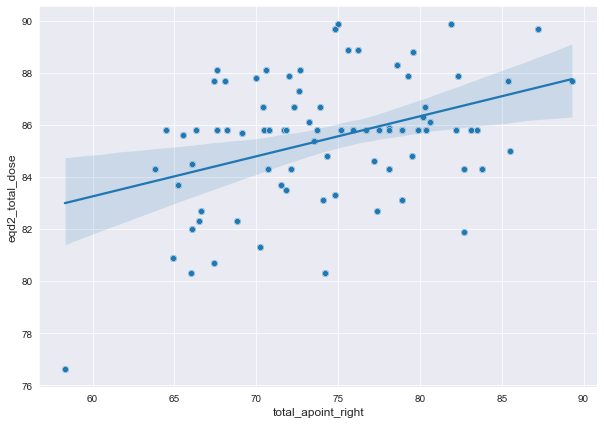

In [13]:
plt.figure(figsize=(10,7))
sns.regplot(data=df, x='total_apoint_right', y='eqd2_total_dose')
plt.ylabel('eqd2_total_dose', fontsize=12)
plt.xlabel('total_apoint_right',fontsize=12)
sns.scatterplot(data=df, x='total_apoint_right', y='eqd2_total_dose')

The graph illustrates the fitted model on the scatter plot of our data. It looks like the model fits the data well.